In [1]:
import sys

class Graph_v1():

	def __init__(self, vertices):
		self.V = vertices
		self.graph = [[0 for column in range(vertices)] 
					for row in range(vertices)]

	# A utility function to print the constructed MST stored in parent[]
	def printMST(self, parent):
		print("Edge \tWeight")
		for i in range(1, self.V):
			print(parent[i], "-", i, "\t", self.graph[i][ parent[i] ])

	# A utility function to find the vertex with 
	# minimum distance value, from the set of vertices 
	# not yet included in shortest path tree
	def minKey(self, key, mstSet):

		# Initialize min value
		min = sys.maxsize

		for v in range(self.V):
			if key[v] < min and mstSet[v] == False:
				min = key[v]
				min_index = v

		return min_index

	# Function to construct and print MST for a graph 
	# represented using adjacency matrix representation
	def primMST(self):

		# Key values used to pick minimum weight edge in cut
		key = [sys.maxsize] * self.V
		parent = [None] * self.V # Array to store constructed MST
		# Make key 0 so that this vertex is picked as first vertex
		key[0] = 0
		mstSet = [False] * self.V

		parent[0] = -1 # First node is always the root of

		for cout in range(self.V):

			# Pick the minimum distance vertex from 
			# the set of vertices not yet processed. 
			# u is always equal to src in first iteration
			u = self.minKey(key, mstSet)

			# Put the minimum distance vertex in 
			# the shortest path tree
			mstSet[u] = True

			# Update dist value of the adjacent vertices 
			# of the picked vertex only if the current 
			# distance is greater than new distance and
			# the vertex in not in the shotest path tree
			for v in range(self.V):

				# graph[u][v] is non zero only for adjacent vertices of m
				# mstSet[v] is false for vertices not yet included in MST
				# Update the key only if graph[u][v] is smaller than key[v]
				if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
						key[v] = self.graph[u][v]
						parent[v] = u

		self.printMST(parent)

    v0  v1  v2  v3  v4
v0   0   2   0   6   0
v1   2   0   3   8   5
v2   0   3   0   0   7
v3   6   8   0   0   9
v4   0   5   7   9   0


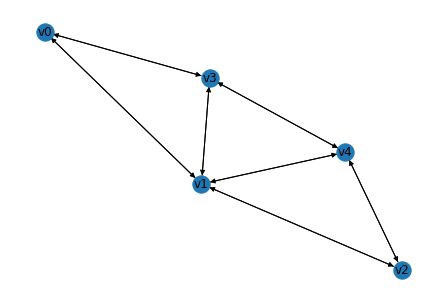

In [2]:
import pandas as pd
import numpy as np
import networkx as nx

df = pd.DataFrame()
df['v0'] = np.array([0,2,0,6,0])
df['v1'] = np.array([2,0,3,8,5])
df['v2'] = np.array([0,3,0,0,7])
df['v3'] = np.array([6,8,0,0,9])
df['v4'] = np.array([0,5,7,9,0])
df.index = np.array(['v0', 'v1', 'v2', 'v3', 'v4'])
print(df)

G = nx.DiGraph(df.values)
nx.draw(G, labels = {0:"v0", 1:"v1", 2:"v2", 3:"v3", 4:"v4"}, with_labels = True)

In [3]:
g = Graph_v1(df.shape[0])
g.graph = df.values
g.primMST()

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5


# Kruskal's algorithm

In [4]:
# Python program for Kruskal's algorithm to find 
# Minimum Spanning Tree of a given connected, 
# undirected and weighted graph 

from collections import defaultdict 

#Class to represent a graph 
class Graph_v2: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = [] # default dictionary 
								# to store graph 
		

	# function to add an edge to graph 
	def addEdge(self,u,v,w): 
		self.graph.append([u,v,w]) 

	# A utility function to find set of an element i 
	# (uses path compression technique) 
	def find(self, parent, i): 
		if parent[i] == i: 
			return i 
		return self.find(parent, parent[i]) 

	# A function that does union of two sets of x and y 
	# (uses union by rank) 
	def union(self, parent, rank, x, y): 
		xroot = self.find(parent, x) 
		yroot = self.find(parent, y) 

		# Attach smaller rank tree under root of 
		# high rank tree (Union by Rank) 
		if rank[xroot] < rank[yroot]: 
			parent[xroot] = yroot 
		elif rank[xroot] > rank[yroot]: 
			parent[yroot] = xroot 

		# If ranks are same, then make one as root 
		# and increment its rank by one 
		else : 
			parent[yroot] = xroot 
			rank[xroot] += 1

	# The main function to construct MST using Kruskal's 
		# algorithm 
	def KruskalMST(self): 

		result =[] #This will store the resultant MST 

		i = 0 # An index variable, used for sorted edges 
		e = 0 # An index variable, used for result[] 

			# Step 1: Sort all the edges in non-decreasing 
				# order of their 
				# weight. If we are not allowed to change the 
				# given graph, we can create a copy of graph 
		self.graph = sorted(self.graph,key=lambda item: item[2]) 

		parent = [] ; rank = [] 

		# Create V subsets with single elements 
		for node in range(self.V): 
			parent.append(node) 
			rank.append(0) 
	
		# Number of edges to be taken is equal to V-1 
		while e < self.V -1 : 

			# Step 2: Pick the smallest edge and increment 
					# the index for next iteration 
			u,v,w = self.graph[i] 
			i = i + 1
			x = self.find(parent, u) 
			y = self.find(parent ,v) 

			# If including this edge does't cause cycle, 
						# include it in result and increment the index 
						# of result for next edge 
			if x != y: 
				e = e + 1	
				result.append([u,v,w]) 
				self.union(parent, rank, x, y)			 
			# Else discard the edge 

		# print the contents of result[] to display the built MST 
		print("Following are the edges in the constructed MST")
		for u,v,weight in result: 
			print ("%d -- %d == %d" % (u,v,weight)) 

In [5]:
# example graph
g = Graph_v2(5) 
g.addEdge(0, 1, 2) # source (u), destination (v), weight (w)
g.addEdge(0, 3, 6) 
g.addEdge(1, 0, 2) 
g.addEdge(1, 2, 3) 
g.addEdge(1, 3, 8) 
g.addEdge(1, 4, 5) 
g.addEdge(2, 1, 3) 
g.addEdge(2, 4, 7) 
g.addEdge(3, 0, 6) 
g.addEdge(3, 1, 8) 
g.addEdge(3, 4, 9) 
g.addEdge(4, 1, 5) 
g.addEdge(4, 2, 7) 
g.addEdge(4, 3, 9) 

g.KruskalMST() 

Following are the edges in the constructed MST
0 -- 1 == 2
1 -- 2 == 3
1 -- 4 == 5
0 -- 3 == 6


In [6]:
# another example
g = Graph_v2(4) 
g.addEdge(0, 1, 10)  # source (u), destination (v), weight (w)
g.addEdge(0, 2, 6) 
g.addEdge(0, 3, 5) 
g.addEdge(1, 3, 15) 
g.addEdge(2, 3, 4) 

g.KruskalMST() 

Following are the edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
